# 이미지 인식
- 고양이 강아지 구분
- CNN 이용
- 원래 데이터는 25,000개 (고양이 + 강아지)
- 여기서는 2000개로 학습을 시킨다
- 검증은 1000개의 이미지 사용 
- colab에서 실행 권장 (런타임-유형변경-GPU 설정)

## 신경망 성능 개선
- 과대적합, 과소적합

##  과대적합

- 모델이 훈련 데이터에 대해서만 잘 동작하도록 만들어져서 새로운 데이터에 대해서는 오히려 잘 동작하지 못하는 경우를 과대적합(over fitting)되었다고 한다
- 머신러닝에서는 과대적합을 피해서 일반적으로 잘 동작하게 모델을 만드는 것이 매우 중요하다
- 이를 모델의 일반화(generalization)라고 한다. 
- 일반화 방법
 - 모델을 단순하게 만든다
 - 더 많은 훈련 데이터 확보한다
 - 훈련 데이터에서 잡음을 줄인다 (아웃라이어 등)
 
- 규제화: 일반화를 위해서 모델을 단순하게 만드는 것을 모델에 제약을 가한다고 하여 규제화(regularization)라고 한다
- 과대적합 발생여부는 성능 및 손실함수의 변화를 보고 판단한다 (훈련 및 검증 데이터에 대한 결과비교)

### 신경망의 과대적합

- 신경망은 파라미터 갯수가 많아서 과대적합할 가능성이 항상 높다. 훈련 데이터 양이 많지 않을 때에는 특히 주의해야 한다. 
- 과대적합이 발생하면 신경망의 구조를 단순하게 만들어야 한다. 
- 그러나 신경망 구조를 너무 단순하게 만들면 표현 능력이 줄어들어 성능이 떨어지게 된다. 과소적합이 발생하는지를 살펴보아야 한다. 


<img src='https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.24.12.png?raw=1' align='left' width=400>


<img  src='https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.23.54.png?raw=1' align='left' width=400>

## 편향과 분산

- 예측 모델 오차는 분산(variance)과 편향(bias) 두 성분이 있다. 
- 분산이란 모델이 너무 복잡하거나 학습데이터 민감하게 반응하여 예측 값이 산발적으로 나타나는 것이다 (과대적합시 발생) 
- 편향이란 모델 자체가 부정확하여 피할 수 없이 발생하는 오차이다 (과소적합시 발생)

<img  src='https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.35.50.png?raw=1' align='left' width=350>

## 데이터 다운로드

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.image as mpimg
import os, os.path, shutil

- cliend URL 명령 사용

In [2]:
!curl -L \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -o ./cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0  77.6M      0 --:--:-- --:--:-- --:--:-- 77.6M


In [3]:
!unzip -q cats_and_dogs_filtered.zip

- 좌측의 폴더 보기에서 확인

In [4]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련 데이터 (이미지)가 있는 폴더
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 검증 데이터 (이미지)가 있는 폴더
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cats_dir

'./cats_and_dogs_filtered/train/cats'

## 학습데이터 (이미지 파일) 확인

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort() #  주의: sort() 결과는 리스트에  즉시 반영된다
print(train_dog_fnames[:10])

['cat.542.jpg', 'cat.982.jpg', 'cat.501.jpg', 'cat.970.jpg', 'cat.492.jpg', 'cat.969.jpg', 'cat.237.jpg', 'cat.741.jpg', 'cat.719.jpg', 'cat.430.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


- 파일(이미지) 갯수

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


## 이미지 샘플 보기

(333, 499, 3)


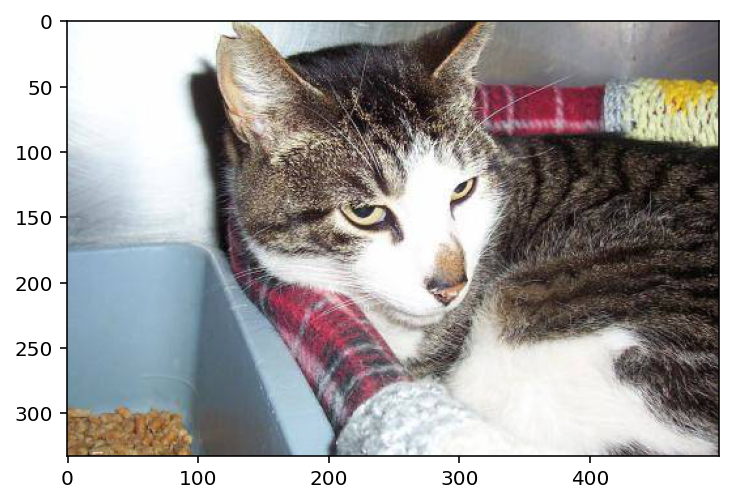

In [8]:
img_path = os.path.join(train_cats_dir, train_cat_fnames[7]) 
img = mpimg.imread(img_path)
print(img.shape)
plt.imshow(img)

## 간단한 CNN을 사용한 모델
- 이미지는 테이블에 담을 수 없으므로 폴더에서 이미지를 하나씩 불러와야 한다. ImageDataGenerator를 사용한다
- 참조 (https://stackoverflow.com/questions/53634924/keras-imagedatagenerator-equivalent-for-csv-files)


In [9]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

- 그림의 크기를 일정하게 바꾸어 사용할 예정

In [10]:
img_width = 150
img_height = 150

datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
											   classes=['cats','dogs'],
											   class_mode='binary',
											   batch_size=20)

validation_generator = datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
											   classes=['cats','dogs'],
											   class_mode='binary',
											   batch_size=20)

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
______________________________________

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.8474 - accuracy: 0.5175 - val_loss: 0.6890 - val_accuracy: 0.5890
Epoch 2/30
100/100 [==============================] - 102s 1s/step - loss: 0.7185 - accuracy: 0.5428 - val_loss: 0.6791 - val_accuracy: 0.5610
Epoch 3/30
100/100 [==============================] - 102s 1s/step - loss: 0.6834 - accuracy: 0.5941 - val_loss: 0.6130 - val_accuracy: 0.6660
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 0.6165 - accuracy: 0.6748 - val_loss: 0.6490 - val_accuracy: 0.6220
Epoch 5/30
100/100 [==============================] - 102s 1s/step - loss: 0.5556 - accuracy: 0.7299 - val_loss: 0.5678 - val_accuracy: 0.7210
Epoch 6/30
100/100 [==============================] - 103s 1s/step - loss: 0.5168 - accuracy: 0.7566 - val_loss: 0.5590 - val_accuracy: 0.7060
Epoch 7/30
100/100 [==============================] - 103s 1s/step - loss: 0.4411 - accuracy: 0.7925 - val_loss: 0.5663 - val_accuracy: 0.7350

## 성능 확인

Text(0.5, 1.0, 'Training(--) and validation loss')

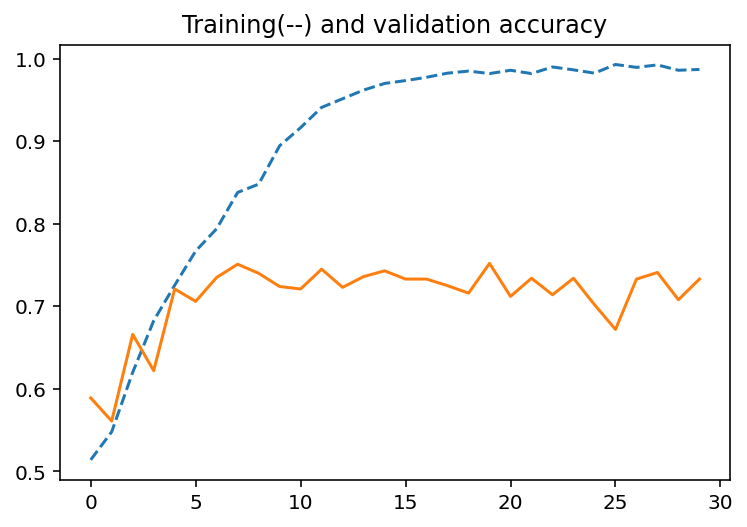

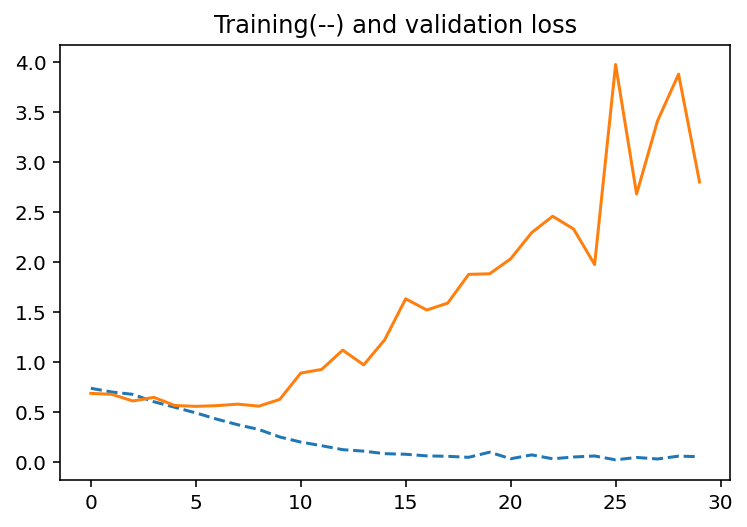

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.figure()
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')


### 과대적합이 발생한 것을 알 수 있다.

# data augmentation과 드롭아웃 사용

In [13]:
train_datagen = ImageDataGenerator(
  rescale= 1./255,
  rotation_range = 60,
  width_shift_range = 0.4,
  height_shift_range = 0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
 											   classes=['cats','dogs'],
											   class_mode='binary',
											   batch_size=20)

validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
 											   classes=['cats','dogs'],
											   class_mode='binary',
											   batch_size=20)


model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   # y_test: [1,0,0,1,..]
# model.add(layers.Dense(2, activation='softmax')) # y_test: [[1,0], [0,1]]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 112s 1s/step - loss: 0.7338 - accuracy: 0.5324 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 111s 1s/step - loss: 0.7016 - accuracy: 0.4997 - val_loss: 0.6800 - val_accuracy: 0.5640
Epoch 3/100
100/100 [==============================] - 110s 1s/step - loss: 0.6889 - accuracy: 0.5643 - val_loss: 0.6606 - val_accuracy: 0.6040
Epoch 4/100
100/100 [==============================] - 110s 1s/step - loss: 0.6908 - accuracy: 0.5726 - val_loss: 0.6600 - val_accuracy: 0.6260
Epoch 5/100
100/100 [==============================] - 110s 1s/step - loss: 0.6850 - accuracy: 0.5612 - val_loss: 0.6744 - val_accuracy: 0.5880
Epoch 6/100
100/100 [==============================] - 111s 1s/step - loss: 0.6793 - accuracy: 0.5947 - val_loss: 0.6402 - val_accuracy: 0.6390
Epoch 7/100
100/100 [==============================] - 110s 1s/step - loss: 0.6748 - accuracy: 0.6190 - val_loss: 0.7072 - val_accuracy:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.figure()
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [ ]:
loss, acc = model.evaluate(X_test) # 내부적으로 확률 > 0.5 이상인 것을 찾은 점수 accuracy

In [ ]:
[(0.3, 0.7), (0.4, 0.6)] = model.predict(X_test)
p = model.predict(X_test)
p[:,1] > 0.5

## 테스트 이미지 파일에 대해서 모델 적용


##  강아지 사진으로  테스트

In [ ]:
import cv2
folder = validation_dogs_dir

images = []
processed_images = []

for file in os.listdir(folder):
    image = mpimg.imread(os.path.join(folder, file))
    if image is not None:
        rescaled = cv2.resize(image, (150, 150))/255.0
        images.append(image)
        processed_images.append(rescaled)

processed_images = np.array(processed_images)
predictions = model.predict(processed_images)


In [ ]:
for index in range(5):
     plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
     plt.show()

In [ ]:
predictions[:5]

In [ ]:
(predictions.ravel()  > 0.5).mean()

## 고양이 사진으로  테스트

In [ ]:
folder = validation_cats_dir # 학습 종료후, 새로운 데이터를 판독하는 과정 
images = []
processed_images = []

for file in os.listdir(folder):
    image = mpimg.imread(os.path.join(folder, file))
    if image is not None:
        rescaled = cv2.resize(image, (150, 150))/255.0
        images.append(image)
        processed_images.append(rescaled)

processed_images = np.array(processed_images)
predictions = model.predict(processed_images) # X_test
# predictions.ravel() < 0.5).mean()
predictions[:,1] > 0.5


In [ ]:
# X_test = pd.DataFrame(processed_images)
# i, v = enumarate(processed_images)
for i, v in enumarate(processed_images):
     p = model.predict(v)
     if p[:,1] > 0.5:
        print(i, "불량")
     if p[:,1] < 0.5:
        print(i, "량")